In [1]:
list_of_packages <- c("ggplot2", "dplyr", "tidyr", "circlize")
for (package in list_of_packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                package,
                character.only = TRUE,
                quietly = TRUE,
                
                warn.conflicts = FALSE
            )
        )
    )
}
    

In [2]:
figures_path <- file.path("../figures/NF0014/")
# Get the current working directory and find Git root
find_git_root <- function() {
    # Get current working directory
    cwd <- getwd()

    # Check if current directory has .git
    if (dir.exists(file.path(cwd, ".git"))) {
        return(cwd)
    }

    # If not, search parent directories
    current_path <- cwd
    while (dirname(current_path) != current_path) {  # While not at root
        parent_path <- dirname(current_path)
        if (dir.exists(file.path(parent_path, ".git"))) {
            return(parent_path)
        }
        current_path <- parent_path
    }

    # If no Git root found, stop with error
    stop("No Git root directory found.")
}

# Find the Git root directory
root_dir <- find_git_root()
cat("Git root directory:", root_dir, "\n")

figures_path <- file.path(root_dir,"5.EDA/figures/umaps")

Git root directory: /home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline 


In [14]:
organoid_fs_lm_results_path <- file.path(
    root_dir,
    "5.EDA/results/linear_modeling/organoid_fs.parquet"
)
organoid_fs_lm_results_df <- arrow::read_parquet(
    organoid_fs_lm_results_path
)
head(organoid_fs_lm_results_df)

patient,treatment,feature,rsquared,rsquared_adj,fvalue,pvalue,coefficient,intercept,Feature_type,Compartment,Channel,Measurement,Extra_info
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
NF0014,Mirdametinib,AreaSizeShape_Organoid_EXTENT,4.279204e-02,0.001174305,1.0282164497,0.32112696,-0.468145170,2.387247e-16,AreaSizeShape,Organoid,NA,EXTENT,NA
NF0014,Mirdametinib,AreaSizeShape_Organoid_EULERNUMBER,1.177449e-02,-0.031191838,0.2740399234,0.60564225,0.293356884,6.435937e-18,AreaSizeShape,Organoid,NA,EULERNUMBER,NA
NF0014,Mirdametinib,AreaSizeShape_Organoid_SURFACEAREA,2.332375e-02,-0.019140439,0.5492568869,0.46612157,0.459432058,1.211966e-16,AreaSizeShape,Organoid,NA,SURFACEAREA,NA
NF0014,Mirdametinib,Colocalization_Organoid_AGPBF_MEDIANCORRELATIONCOEFF,2.256365e-06,-0.043475906,0.0000518965,0.99431427,0.003084999,-1.218707e-17,Colocalization,Organoid,AGPBF,MEDIANCORRELATIONCOEFF,NA
NF0014,Mirdametinib,Colocalization_Organoid_AGPBF_MAXMANDERSCOEFFM1,1.960750e-02,-0.023018259,0.4599918431,0.50439482,0.249997783,-2.109220e-16,Colocalization,Organoid,AGPBF,MAXMANDERSCOEFFM1,NA
NF0014,Mirdametinib,Colocalization_Organoid_AGPBF_MAXMANDERSCOEFFM2,2.179279e-01,0.183924719,6.4090515252,0.01864442,-1.201410787,1.562612e-16,Colocalization,Organoid,AGPBF,MAXMANDERSCOEFFM2,NA


Warning message:
“Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`).”


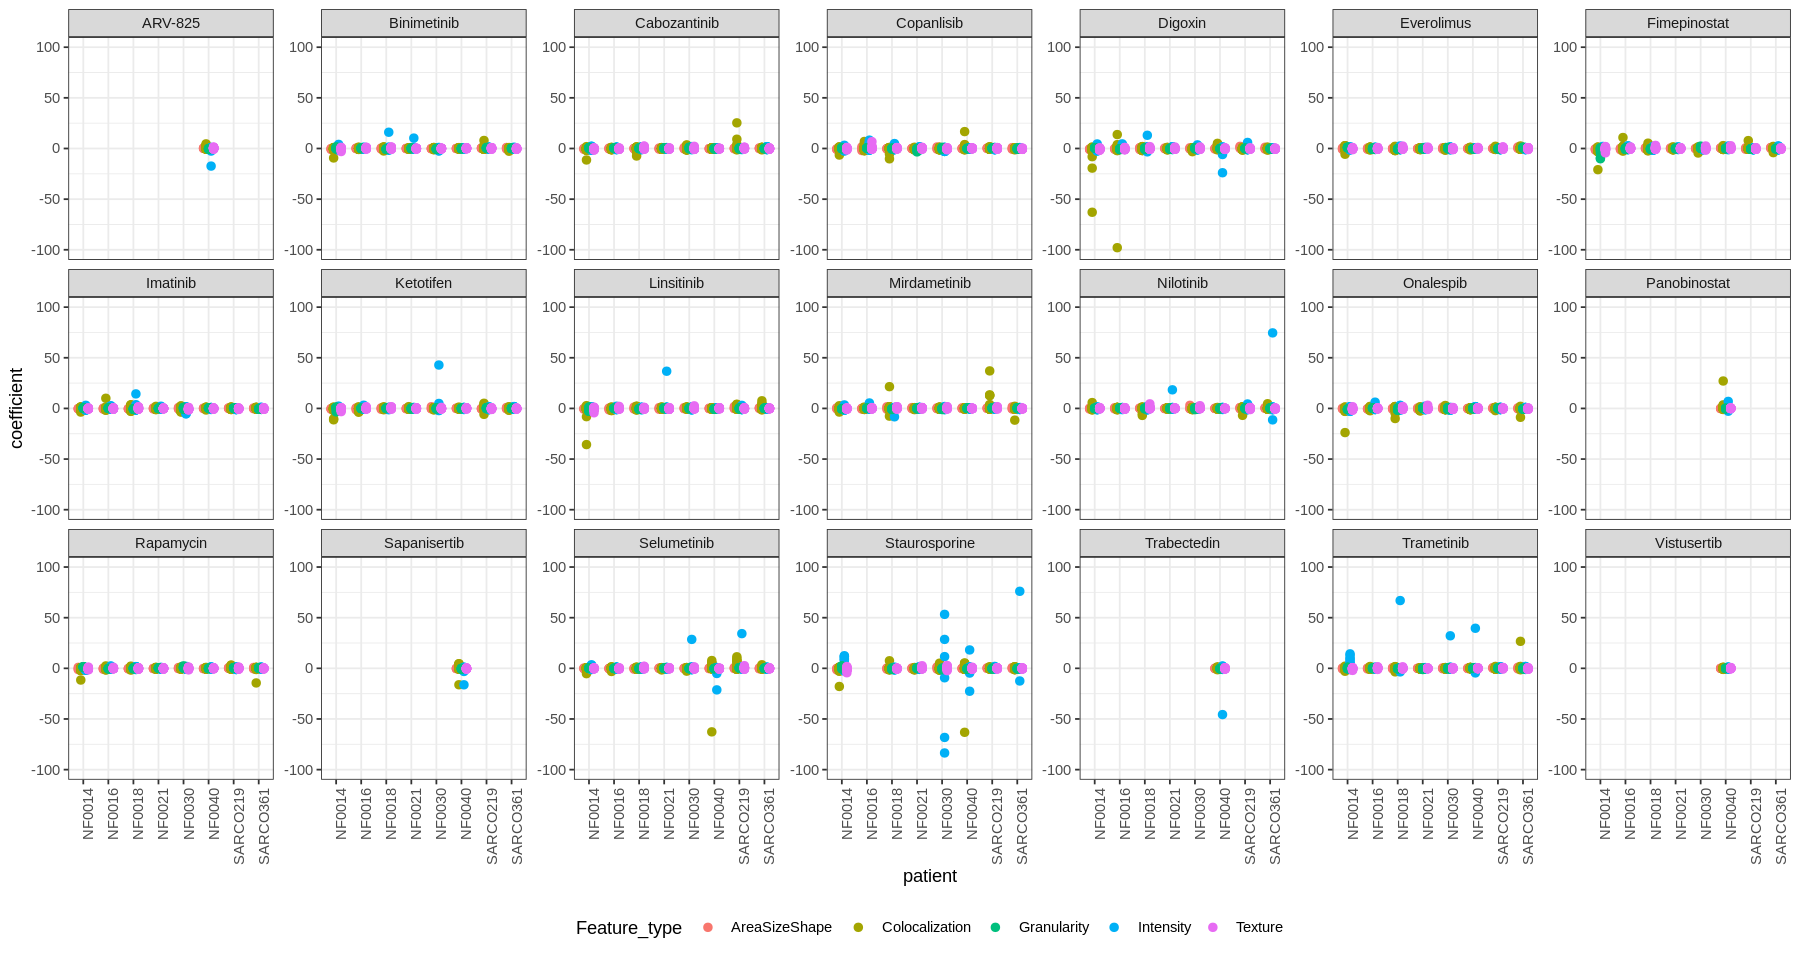

In [19]:
width <- 15
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
coeff_plot <- (
    ggplot(organoid_fs_lm_results_df,
        aes(x = patient , y = coefficient, color = Feature_type))
    + geom_point(
        position = position_dodge(width = 0.5),
        size = 2
    )
    + theme_bw()
    + ylim(-100, 100)
    + facet_wrap( ~ treatment, scales = "free_y", ncol = 7)
    + theme(
        axis.text.x = element_text(angle = 90, hjust = 1),
        legend.position = "bottom"
    )

)
coeff_plot

In [17]:
organoid_fs_lm_results_df_patient <- organoid_fs_lm_results_df %>%
    # filter for just one patient
    filter(patient == "NF0014")
head(organoid_fs_lm_results_df_patient)

patient,treatment,feature,rsquared,rsquared_adj,fvalue,pvalue,coefficient,intercept,Feature_type,Compartment,Channel,Measurement,Extra_info
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
NF0014,Mirdametinib,AreaSizeShape_Organoid_EXTENT,4.279204e-02,0.001174305,1.0282164497,0.32112696,-0.468145170,2.387247e-16,AreaSizeShape,Organoid,NA,EXTENT,NA
NF0014,Mirdametinib,AreaSizeShape_Organoid_EULERNUMBER,1.177449e-02,-0.031191838,0.2740399234,0.60564225,0.293356884,6.435937e-18,AreaSizeShape,Organoid,NA,EULERNUMBER,NA
NF0014,Mirdametinib,AreaSizeShape_Organoid_SURFACEAREA,2.332375e-02,-0.019140439,0.5492568869,0.46612157,0.459432058,1.211966e-16,AreaSizeShape,Organoid,NA,SURFACEAREA,NA
NF0014,Mirdametinib,Colocalization_Organoid_AGPBF_MEDIANCORRELATIONCOEFF,2.256365e-06,-0.043475906,0.0000518965,0.99431427,0.003084999,-1.218707e-17,Colocalization,Organoid,AGPBF,MEDIANCORRELATIONCOEFF,NA
NF0014,Mirdametinib,Colocalization_Organoid_AGPBF_MAXMANDERSCOEFFM1,1.960750e-02,-0.023018259,0.4599918431,0.50439482,0.249997783,-2.109220e-16,Colocalization,Organoid,AGPBF,MAXMANDERSCOEFFM1,NA
NF0014,Mirdametinib,Colocalization_Organoid_AGPBF_MAXMANDERSCOEFFM2,2.179279e-01,0.183924719,6.4090515252,0.01864442,-1.201410787,1.562612e-16,Colocalization,Organoid,AGPBF,MAXMANDERSCOEFFM2,NA


Warning message:
“Removed 32 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


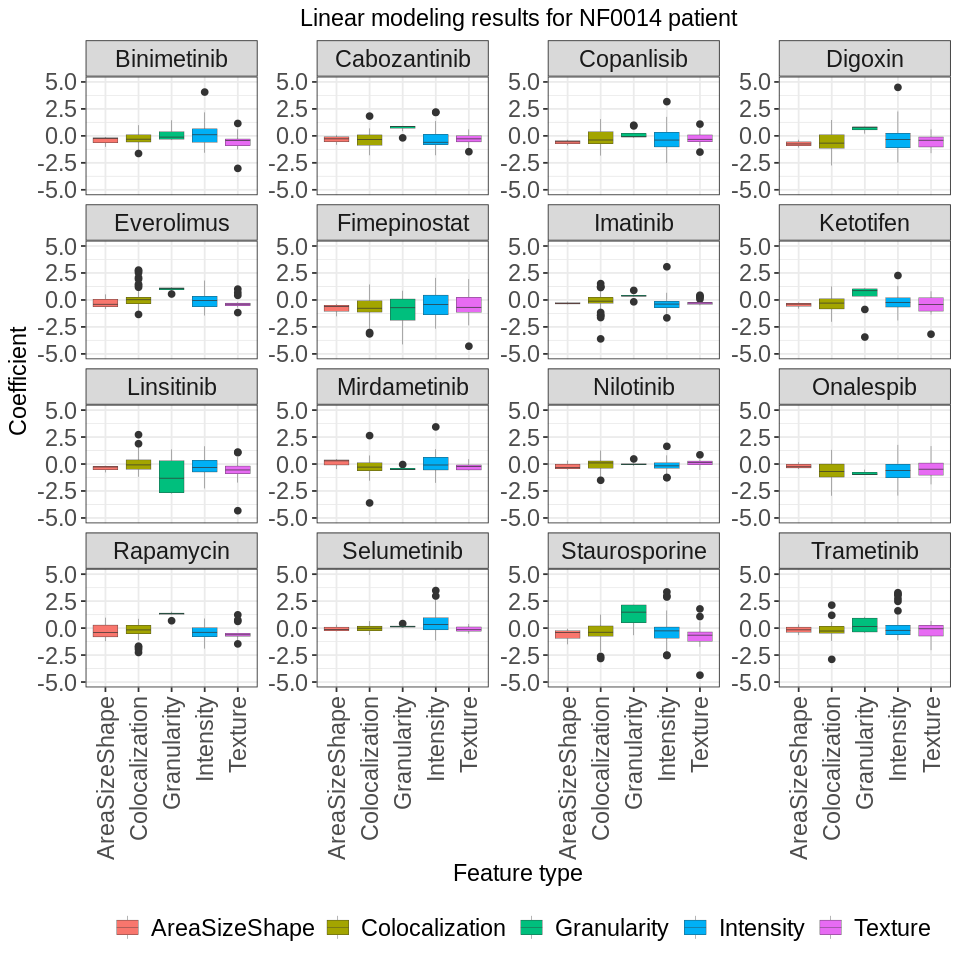

In [47]:
width <- 8
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
plot <- (
    ggplot(organoid_fs_lm_results_df_patient,
        aes(x = Feature_type, y = coefficient, fill = Feature_type))
    # + geom_point(
    #     position = position_dodge(width = 0.5),
    #     size = 2
    # )
    + geom_boxplot(
        position = position_dodge(width = 0.5),
        size = 0.1,
    )
    + theme_bw()
    + labs(
        x = "Feature type",
        y = "Coefficient",
        title = "Linear modeling results for NF0014 patient"
    )
    + ylim(-5, 5)
    + facet_wrap( ~ treatment, scales = "free_y", ncol = 4)
    + theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 14),
        legend.position = "bottom",
        strip.text = element_text(size = 14)
    )
    + guides(
        fill = guide_legend(title = "")
    )
    
)
plot

## Single cell plots

In [68]:
sc_fs_lm_results_path <- file.path(
    root_dir,
    "5.EDA/results/linear_modeling/single_cell_fs.parquet"
)
sc_fs_lm_results_df <- arrow::read_parquet(
    sc_fs_lm_results_path
)
head(sc_fs_lm_results_df)

patient,treatment,feature,rsquared,rsquared_adj,fvalue,pvalue,coefficient,intercept,Feature_type,Compartment,Channel,Measurement,Extra_info
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
NF0014,Mirdametinib,AreaSizeShape_Nuclei_EXTENT,4.514536e-04,-0.001596802,0.22040886,0.63893826,-0.04717608,-4.076600e-17,AreaSizeShape,Nuclei,NA,EXTENT,NA
NF0014,Mirdametinib,AreaSizeShape_Nuclei_SURFACEAREA,7.826988e-04,-0.001264878,0.38225620,0.53668667,-0.06181901,-2.471981e-17,AreaSizeShape,Nuclei,NA,SURFACEAREA,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MEDIANCORRELATIONCOEFF,6.251502e-03,0.004215132,3.06992452,0.08038124,-0.18280264,2.428613e-17,Colocalization,Nuclei,AGPBF,MEDIANCORRELATIONCOEFF,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MEANOVERLAPCOEFF,9.862252e-05,-0.001950356,0.04813253,0.82643699,-0.02343518,-2.688821e-17,Colocalization,Nuclei,AGPBF,MEANOVERLAPCOEFF,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MAXK1,3.105202e-03,0.001062385,1.52005886,0.21820418,-0.11656168,-1.162265e-16,Colocalization,Nuclei,AGPBF,MAXK1,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MEANK2,1.685831e-04,-0.001880252,0.08228241,0.77434961,0.02946674,-1.092876e-16,Colocalization,Nuclei,AGPBF,MEANK2,NA


In [69]:
unique(sc_fs_lm_results_df$Compartment)
# drop the NA in Compartment
sc_fs_lm_results_df <- sc_fs_lm_results_df %>%
    filter(!is.na(Compartment))
unique(sc_fs_lm_results_df$Compartment)


[1] "Nuclei"    NA          "Cell"      "Cytoplasm"

[1] "Nuclei"    "Cell"      "Cytoplasm"

In [70]:
# make the compartments a factor
sc_fs_lm_results_df$Compartment <- factor(
    sc_fs_lm_results_df$Compartment,
    levels = c("Nuclei", "Cytoplasm", "Cell")
)

Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_point()`).”


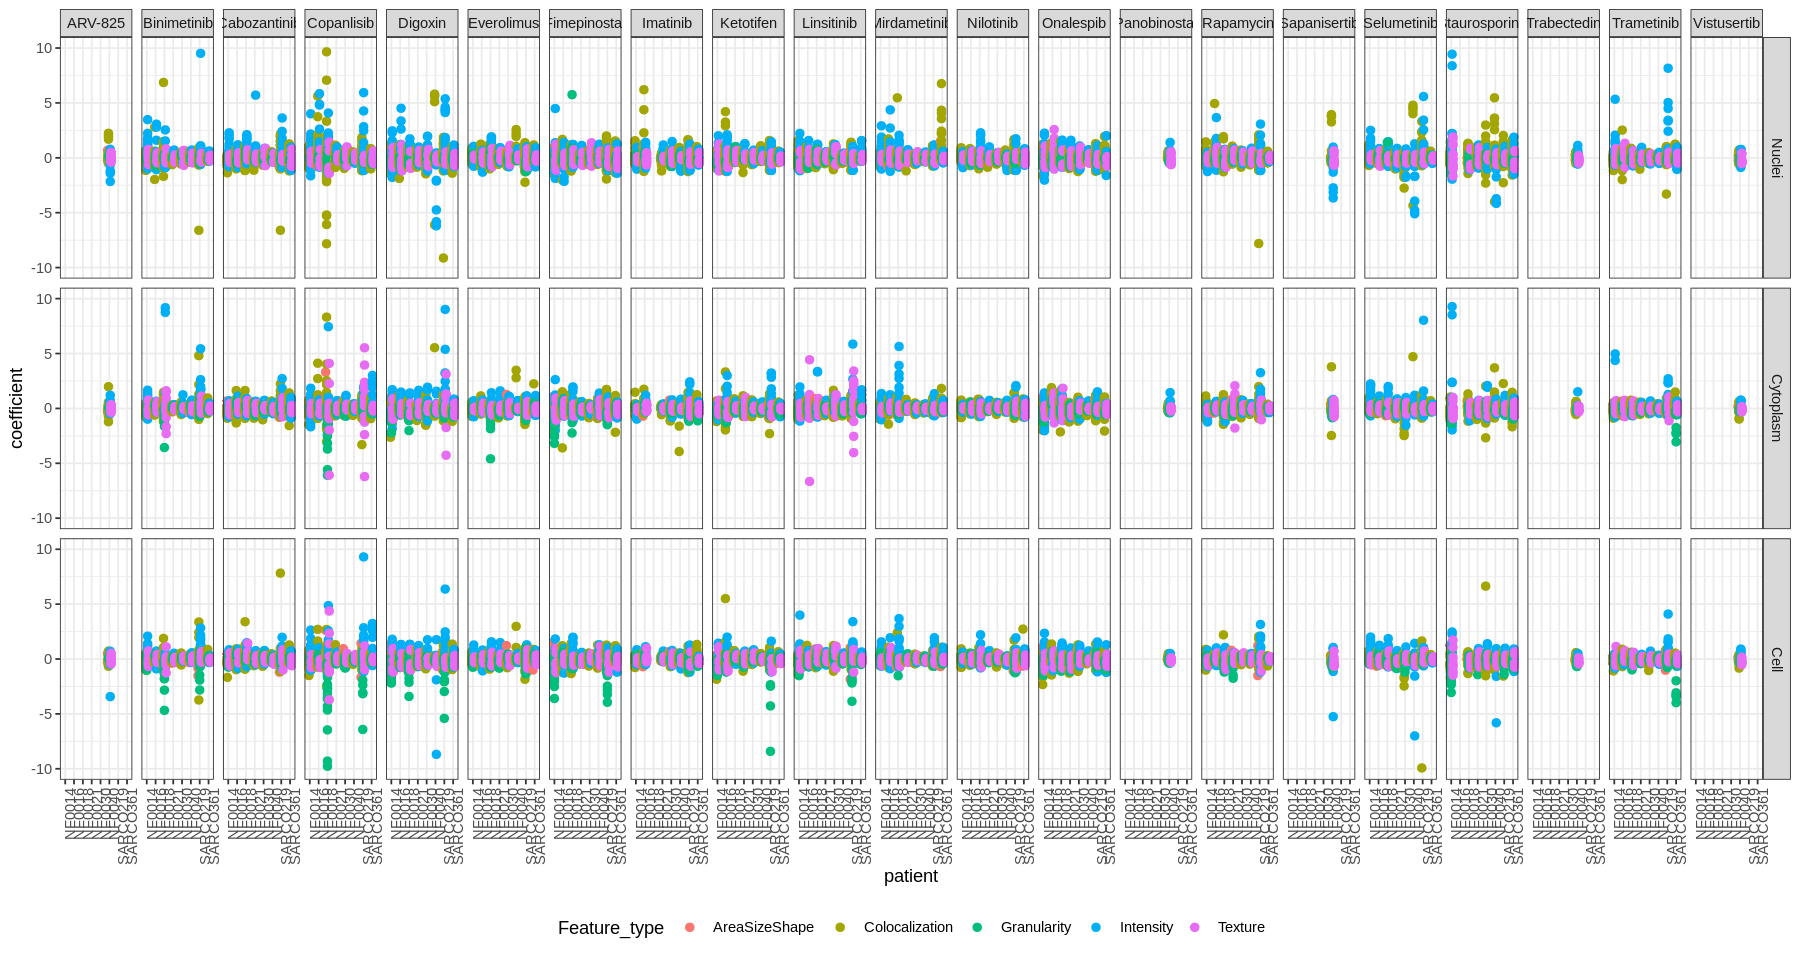

In [71]:
width <- 15
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
coeff_plot <- (
    ggplot(sc_fs_lm_results_df,
        aes(x = patient , y = coefficient, color = Feature_type))
    + geom_point(
        position = position_dodge(width = 0.5),
        size = 2
    )
    + theme_bw()
    + ylim(-10, 10)
    + facet_grid(Compartment ~ treatment)
    + theme(
        axis.text.x = element_text(angle = 90, hjust = 1),
        legend.position = "bottom"
    )

)
coeff_plot

In [72]:
sc_fs_lm_results_df_patient <- sc_fs_lm_results_df %>%
    # filter for just one patient
    filter(patient == "NF0014")
head(sc_fs_lm_results_df_patient)

patient,treatment,feature,rsquared,rsquared_adj,fvalue,pvalue,coefficient,intercept,Feature_type,Compartment,Channel,Measurement,Extra_info
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>
NF0014,Mirdametinib,AreaSizeShape_Nuclei_EXTENT,4.514536e-04,-0.001596802,0.22040886,0.63893826,-0.04717608,-4.076600e-17,AreaSizeShape,Nuclei,NA,EXTENT,NA
NF0014,Mirdametinib,AreaSizeShape_Nuclei_SURFACEAREA,7.826988e-04,-0.001264878,0.38225620,0.53668667,-0.06181901,-2.471981e-17,AreaSizeShape,Nuclei,NA,SURFACEAREA,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MEDIANCORRELATIONCOEFF,6.251502e-03,0.004215132,3.06992452,0.08038124,-0.18280264,2.428613e-17,Colocalization,Nuclei,AGPBF,MEDIANCORRELATIONCOEFF,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MEANOVERLAPCOEFF,9.862252e-05,-0.001950356,0.04813253,0.82643699,-0.02343518,-2.688821e-17,Colocalization,Nuclei,AGPBF,MEANOVERLAPCOEFF,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MAXK1,3.105202e-03,0.001062385,1.52005886,0.21820418,-0.11656168,-1.162265e-16,Colocalization,Nuclei,AGPBF,MAXK1,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MEANK2,1.685831e-04,-0.001880252,0.08228241,0.77434961,0.02946674,-1.092876e-16,Colocalization,Nuclei,AGPBF,MEANK2,NA


In [73]:
sc_fs_lm_results_df_patient$Compartment <- factor(
    sc_fs_lm_results_df_patient$Compartment,
    levels = c("Nuclei", "Cytoplasm", "Cell")
)

Warning message:
“Removed 12 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


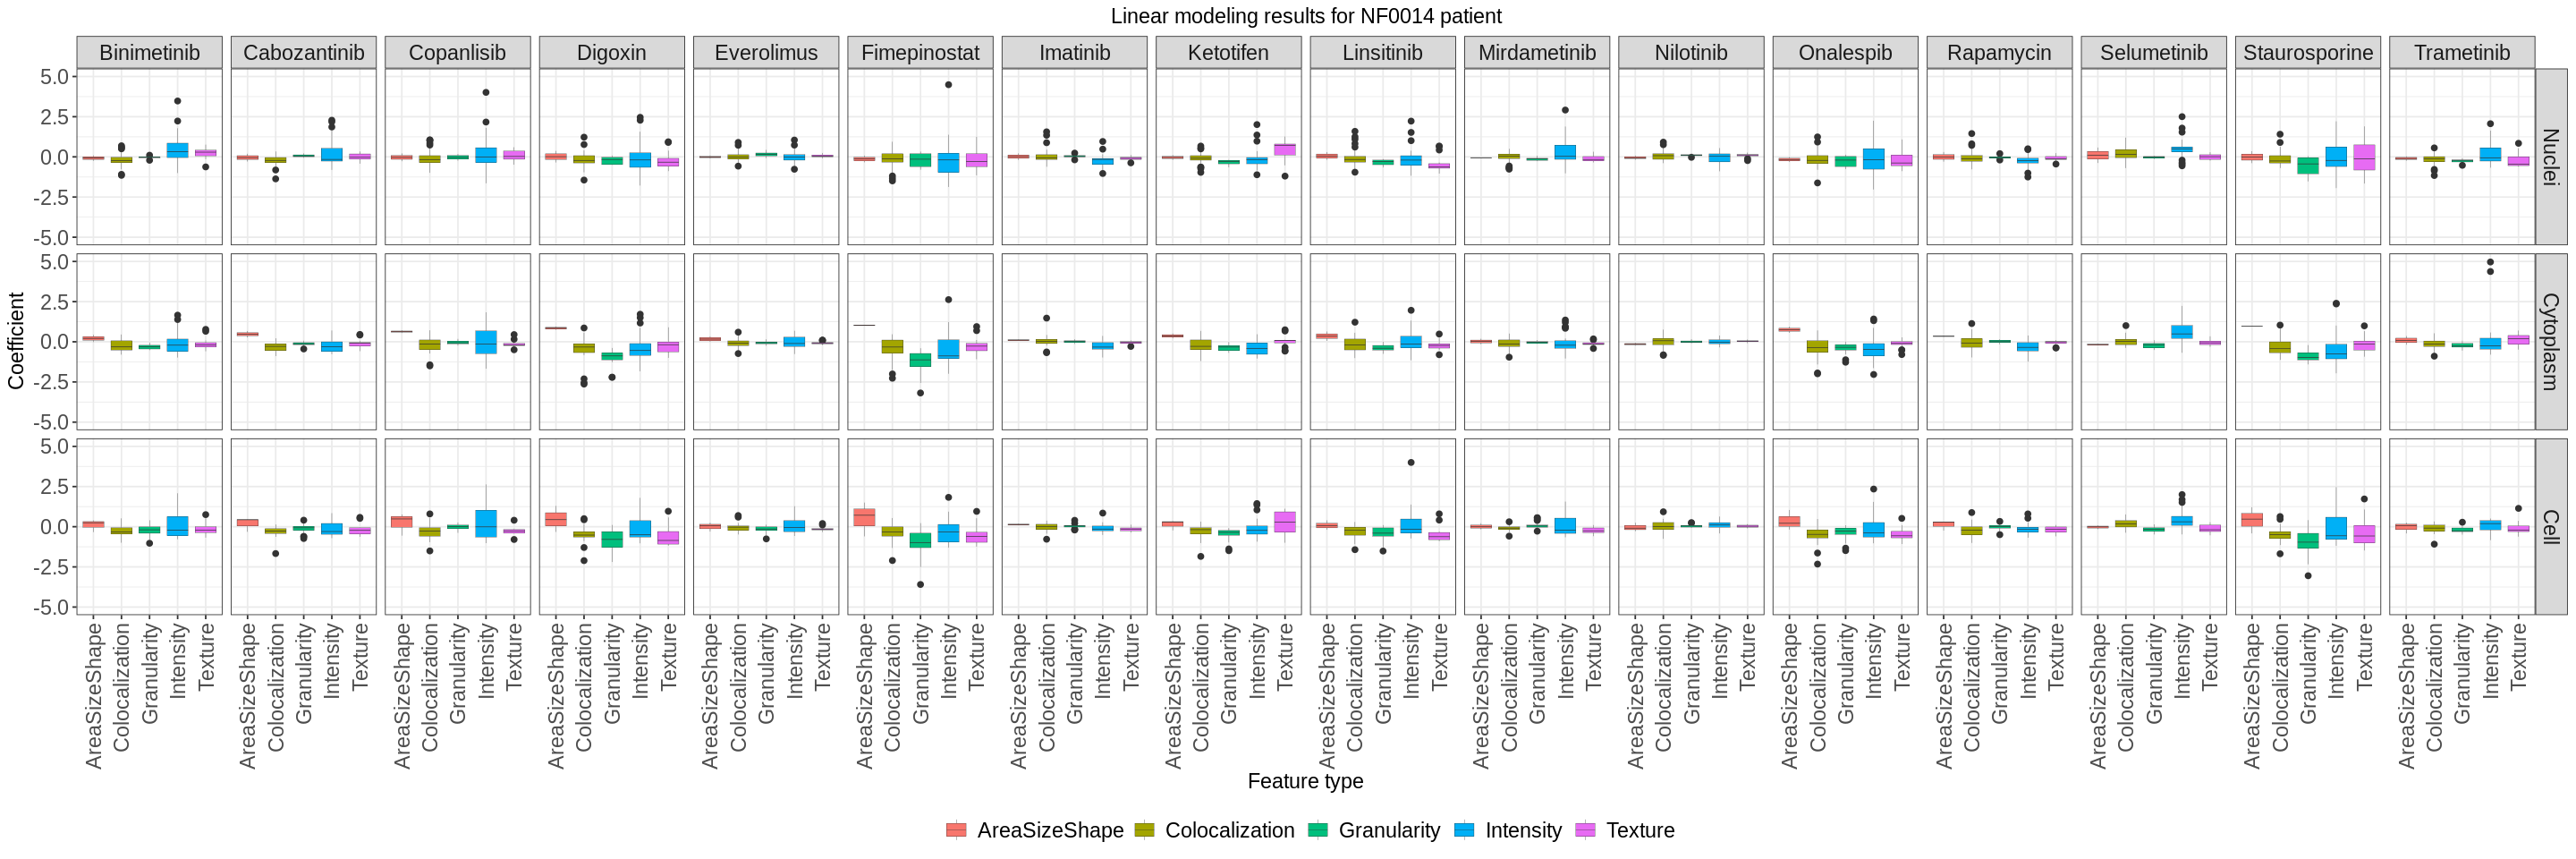

In [78]:
width <- 24
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
plot <- (
    ggplot(sc_fs_lm_results_df_patient,
        aes(x = Feature_type, y = coefficient, fill = Feature_type))
    # + geom_point(
    #     position = position_dodge(width = 0.5),
    #     size = 2
    # )
    + geom_boxplot(
        position = position_dodge(width = 0.5),
        size = 0.1,
    )
    + theme_bw()
    + labs(
        x = "Feature type",
        y = "Coefficient",
        title = "Linear modeling results for NF0014 patient"
    )
    + ylim(-5, 5)
    + facet_grid(Compartment ~ treatment)
    + theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 14),
        legend.position = "bottom",
        strip.text = element_text(size = 14)
    )
    + guides(
        fill = guide_legend(title = "")
    )
    
)
plot

In [79]:
head(sc_fs_lm_results_df_patient)

patient,treatment,feature,rsquared,rsquared_adj,fvalue,pvalue,coefficient,intercept,Feature_type,Compartment,Channel,Measurement,Extra_info
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>
NF0014,Mirdametinib,AreaSizeShape_Nuclei_EXTENT,4.514536e-04,-0.001596802,0.22040886,0.63893826,-0.04717608,-4.076600e-17,AreaSizeShape,Nuclei,NA,EXTENT,NA
NF0014,Mirdametinib,AreaSizeShape_Nuclei_SURFACEAREA,7.826988e-04,-0.001264878,0.38225620,0.53668667,-0.06181901,-2.471981e-17,AreaSizeShape,Nuclei,NA,SURFACEAREA,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MEDIANCORRELATIONCOEFF,6.251502e-03,0.004215132,3.06992452,0.08038124,-0.18280264,2.428613e-17,Colocalization,Nuclei,AGPBF,MEDIANCORRELATIONCOEFF,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MEANOVERLAPCOEFF,9.862252e-05,-0.001950356,0.04813253,0.82643699,-0.02343518,-2.688821e-17,Colocalization,Nuclei,AGPBF,MEANOVERLAPCOEFF,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MAXK1,3.105202e-03,0.001062385,1.52005886,0.21820418,-0.11656168,-1.162265e-16,Colocalization,Nuclei,AGPBF,MAXK1,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MEANK2,1.685831e-04,-0.001880252,0.08228241,0.77434961,0.02946674,-1.092876e-16,Colocalization,Nuclei,AGPBF,MEANK2,NA


In [80]:
sc_fs_lm_results_df_patient_drug <- sc_fs_lm_results_df_patient %>%
    filter(treatment == "Mirdametinib")

In [81]:
head(sc_fs_lm_results_df_patient_drug)

patient,treatment,feature,rsquared,rsquared_adj,fvalue,pvalue,coefficient,intercept,Feature_type,Compartment,Channel,Measurement,Extra_info
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>
NF0014,Mirdametinib,AreaSizeShape_Nuclei_EXTENT,4.514536e-04,-0.001596802,0.22040886,0.63893826,-0.04717608,-4.076600e-17,AreaSizeShape,Nuclei,NA,EXTENT,NA
NF0014,Mirdametinib,AreaSizeShape_Nuclei_SURFACEAREA,7.826988e-04,-0.001264878,0.38225620,0.53668667,-0.06181901,-2.471981e-17,AreaSizeShape,Nuclei,NA,SURFACEAREA,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MEDIANCORRELATIONCOEFF,6.251502e-03,0.004215132,3.06992452,0.08038124,-0.18280264,2.428613e-17,Colocalization,Nuclei,AGPBF,MEDIANCORRELATIONCOEFF,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MEANOVERLAPCOEFF,9.862252e-05,-0.001950356,0.04813253,0.82643699,-0.02343518,-2.688821e-17,Colocalization,Nuclei,AGPBF,MEANOVERLAPCOEFF,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MAXK1,3.105202e-03,0.001062385,1.52005886,0.21820418,-0.11656168,-1.162265e-16,Colocalization,Nuclei,AGPBF,MAXK1,NA
NF0014,Mirdametinib,Colocalization_Nuclei_AGPBF_MEANK2,1.685831e-04,-0.001880252,0.08228241,0.77434961,0.02946674,-1.092876e-16,Colocalization,Nuclei,AGPBF,MEANK2,NA


In [88]:
# isolate the Colocalization feature type
sc_fs_lm_results_df_patient_drug_coloc <- sc_fs_lm_results_df_patient_drug %>%
    filter(Feature_type == "Colocalization")
sc_fs_lm_results_df_patient_drug_all_other <- sc_fs_lm_results_df_patient_drug %>%
    filter(Feature_type != "Colocalization")


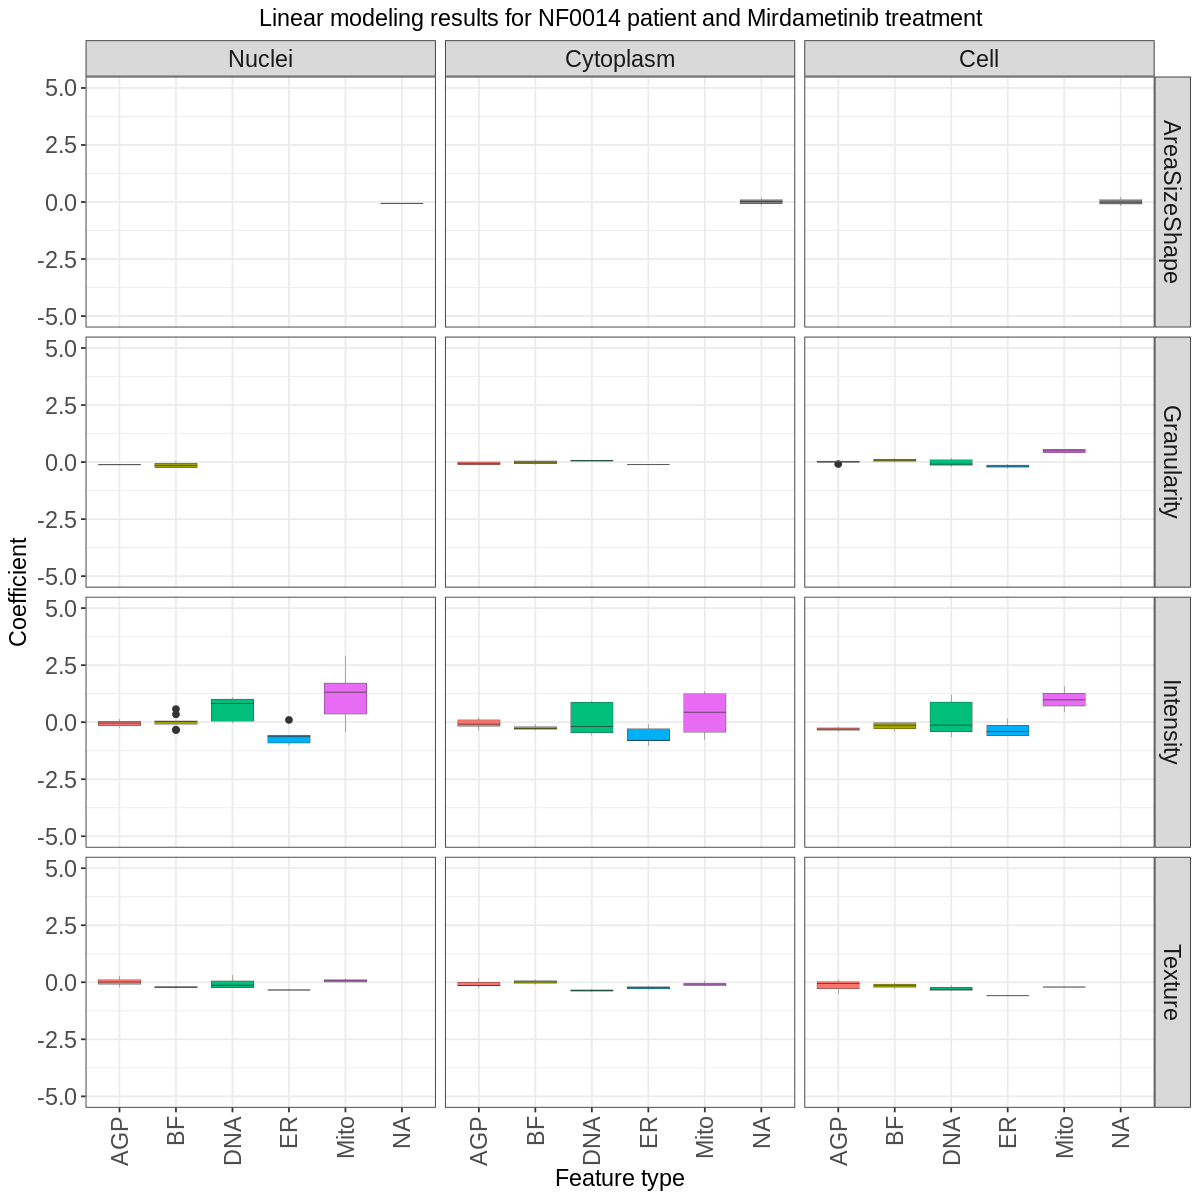

In [93]:
width <- 10
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
plot <- (
    ggplot(sc_fs_lm_results_df_patient_drug_all_other,
        aes(x = Channel, y = coefficient, fill = Channel))
    # + geom_point(
    #     position = position_dodge(width = 0.5),
    #     size = 2
    # )
    + geom_boxplot(
        position = position_dodge(width = 0.5),
        size = 0.1,
    )
    + theme_bw()
    + labs(
        x = "Feature type",
        y = "Coefficient",
        title = "Linear modeling results for NF0014 patient and Mirdametinib treatment"
    )
    + ylim(-5, 5)
    + facet_grid(Feature_type ~ Compartment)
    + theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 14),
        legend.position = "none",
        strip.text = element_text(size = 14),
    )
    + guides(
        fill = guide_legend(title = "")
    )
    
)
plot

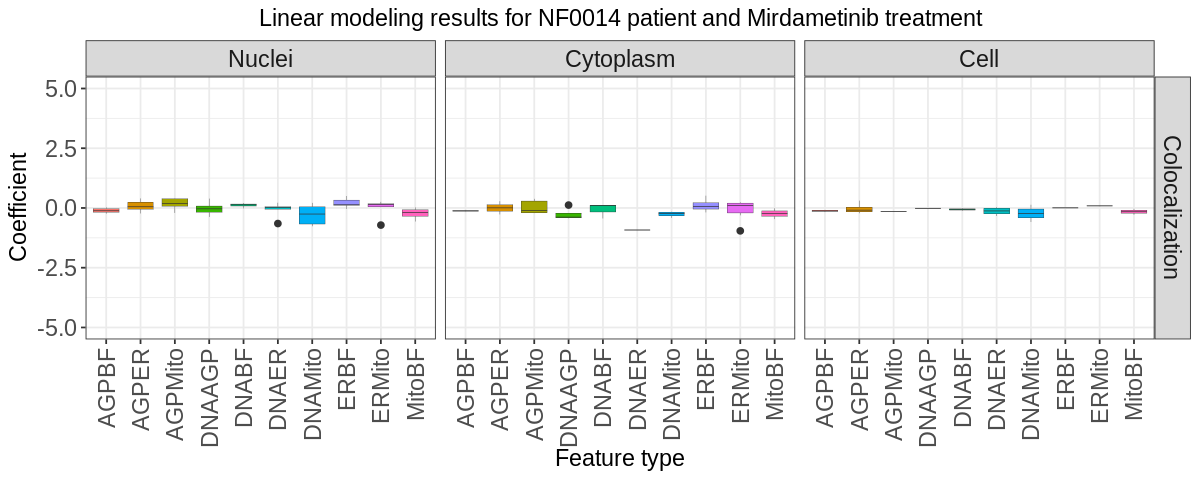

In [95]:
width <- 10
height <- 4
options(repr.plot.width = width, repr.plot.height = height)
plot <- (
    ggplot(sc_fs_lm_results_df_patient_drug_coloc,
        aes(x = Channel, y = coefficient, fill = Channel))
    # + geom_point(
    #     position = position_dodge(width = 0.5),
    #     size = 2
    # )
    + geom_boxplot(
        position = position_dodge(width = 0.5),
        size = 0.1,
    )
    + theme_bw()
    + labs(
        x = "Feature type",
        y = "Coefficient",
        title = "Linear modeling results for NF0014 patient and Mirdametinib treatment"
    )
    + ylim(-5, 5)
    + facet_grid(Feature_type ~ Compartment)
    + theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        plot.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 14),
        legend.position = "none",
        strip.text = element_text(size = 14),
    )
    + guides(
        fill = guide_legend(title = "")
    )
    
)
plot